### Setup and Imports

In [ ]:
!pip install qiskit
!pip install qiskit_aer
!pip install pylatexenc
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

### Quantum Circuit Creation and Gates

--- Quantum Circuit ---


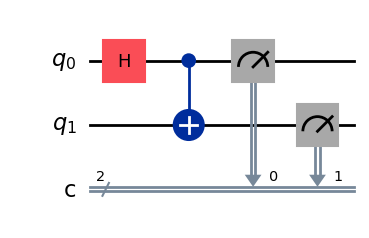

In [ ]:
# We'll create a circuit with 2 qubits and 2 classical bits for measurement.
qc = QuantumCircuit(2, 2)

# Apply Hadamard Gate
qc.h(0)

# Apply a CNOT (Controlled-NOT) gate with qubit 0 as control and qubit 1 as target
qc.cx(0, 1)

# Measure the Qubits
qc.measure([0, 1], [0, 1])

# Print the Circuit
print("--- Quantum Circuit ---")
display(qc.draw('mpl'))

### Simulate the Circuit

In [ ]:
# Simulate the Circuit using AerSimulator
simulator = AerSimulator()

# Transpile the circuit for the simulator.
compiled_circuit = transpile(qc, simulator)

# Run the simulation.
job = simulator.run(compiled_circuit, shots=1024) # Run 1024 times to get counts
result = job.result()

# Get the Measurement Results (Counts)
counts = result.get_counts(qc)

print("\n--- Measurement Results (Counts) ---")
print(counts)
print("-" * 35)


--- Measurement Results (Counts) ---
{'00': 510, '11': 514}
-----------------------------------


### Visualize the Results

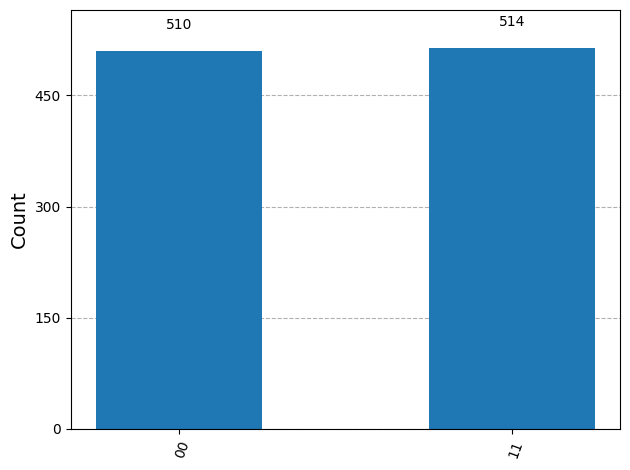


Histogram plot generated and displayed.


In [ ]:
try:
    hist_plot = plot_histogram(counts)
    display(hist_plot)
    print("\nHistogram plot generated and displayed.")
except Exception as e:
    print(f"\nCould not generate or display histogram plot: {e}")
    print("Ensure matplotlib is installed and you are in a graphical environment to view plots.")